In [1]:
%load_ext autoreload
%autoreload 2

### Imports

In [1]:
import tensorflow as tf
from psychrnn.backend.models.basic import Basic
from psychrnn.backend.gain import Basic2
# from psychrnn.backend.gain import rt_mask_mse_06, rt_mask_mse_07, rt_mask_mse_08
# from task.checker import Checkerboard2AFC

from tqdm import tqdm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import os

ModuleNotFoundError: No module named 'psychrnn.backend.gain'

### Initialize Task

In [3]:
experiment = 'interactive'
name = 'basic'

In [4]:
dt = 10
tau = 50
T = 3000
N_batch = 50
N_rec = 100

In [5]:
task = Checkerboard2AFC(dt=dt, tau=tau, T=T, N_batch=N_batch)

### Set up parameters

In [6]:
network_params = task.get_task_params()
network_params['name'] = name
network_params['N_rec'] = N_rec
network_params['rec_noise'] = 0.1

network_params["transfer_function"] = tf.nn.relu
network_params["output_transfer_function"] = tf.nn.sigmoid

network_params["loss_function"] = "rt_mask_mse"
network_params["rt_mask_mse"] = rt_mask_mse_07

In [7]:
try:
    model.destruct()
except:
    pass

model = Basic2(network_params)

### Train Model

In [8]:
trials = 25000
train_params = {}
train_params['save_weights_path'] =  None
train_params['training_iters'] = trials
train_params['learning_rate'] = .001
train_params['loss_epoch'] = N_batch / N_batch
train_params['save_training_weights_epoch'] = 1000 / N_batch
train_params['training_weights_path'] = None

In [9]:
losses, initialTime, trainTime = model.train(task, train_params)

Iter 50, Minibatch Loss= 0.118617
Iter 100, Minibatch Loss= 0.114990
Iter 150, Minibatch Loss= 0.122239
Iter 200, Minibatch Loss= 0.126851
Iter 250, Minibatch Loss= 0.141414
Iter 300, Minibatch Loss= 0.152567
Iter 350, Minibatch Loss= 0.141469
Iter 400, Minibatch Loss= 0.135399
Iter 450, Minibatch Loss= 0.125913
Iter 500, Minibatch Loss= 0.113830
Iter 550, Minibatch Loss= 0.118837
Iter 600, Minibatch Loss= 0.117272
Iter 650, Minibatch Loss= 0.113863
Iter 700, Minibatch Loss= 0.097743
Iter 750, Minibatch Loss= 0.097485
Iter 800, Minibatch Loss= 0.105642
Iter 850, Minibatch Loss= 0.099080
Iter 900, Minibatch Loss= 0.097397
Iter 950, Minibatch Loss= 0.101498
Iter 1000, Minibatch Loss= 0.090526
Iter 1050, Minibatch Loss= 0.092229
Iter 1100, Minibatch Loss= 0.093108
Iter 1150, Minibatch Loss= 0.073494
Iter 1200, Minibatch Loss= 0.070994
Iter 1250, Minibatch Loss= 0.073856
Iter 1300, Minibatch Loss= 0.081075
Iter 1350, Minibatch Loss= 0.069400
Iter 1400, Minibatch Loss= 0.073794
Iter 1450, M

Iter 11450, Minibatch Loss= 0.015736
Iter 11500, Minibatch Loss= 0.015092
Iter 11550, Minibatch Loss= 0.014790
Iter 11600, Minibatch Loss= 0.013789
Iter 11650, Minibatch Loss= 0.009520
Iter 11700, Minibatch Loss= 0.018832
Iter 11750, Minibatch Loss= 0.018158
Iter 11800, Minibatch Loss= 0.021365
Iter 11850, Minibatch Loss= 0.014013
Iter 11900, Minibatch Loss= 0.013449
Iter 11950, Minibatch Loss= 0.012657
Iter 12000, Minibatch Loss= 0.019394
Iter 12050, Minibatch Loss= 0.017676
Iter 12100, Minibatch Loss= 0.012332
Iter 12150, Minibatch Loss= 0.019235
Iter 12200, Minibatch Loss= 0.015715
Iter 12250, Minibatch Loss= 0.015399
Iter 12300, Minibatch Loss= 0.015758
Iter 12350, Minibatch Loss= 0.016504
Iter 12400, Minibatch Loss= 0.014922
Iter 12450, Minibatch Loss= 0.012028
Iter 12500, Minibatch Loss= 0.027016
Iter 12550, Minibatch Loss= 0.019779
Iter 12600, Minibatch Loss= 0.024117
Iter 12650, Minibatch Loss= 0.014056
Iter 12700, Minibatch Loss= 0.019342
Iter 12750, Minibatch Loss= 0.018477
I

Iter 22550, Minibatch Loss= 0.014909
Iter 22600, Minibatch Loss= 0.008024
Iter 22650, Minibatch Loss= 0.016485
Iter 22700, Minibatch Loss= 0.007843
Iter 22750, Minibatch Loss= 0.011734
Iter 22800, Minibatch Loss= 0.005561
Iter 22850, Minibatch Loss= 0.011959
Iter 22900, Minibatch Loss= 0.008507
Iter 22950, Minibatch Loss= 0.012117
Iter 23000, Minibatch Loss= 0.008711
Iter 23050, Minibatch Loss= 0.004674
Iter 23100, Minibatch Loss= 0.010463
Iter 23150, Minibatch Loss= 0.006191
Iter 23200, Minibatch Loss= 0.011860
Iter 23250, Minibatch Loss= 0.013777
Iter 23300, Minibatch Loss= 0.008472
Iter 23350, Minibatch Loss= 0.008863
Iter 23400, Minibatch Loss= 0.004456
Iter 23450, Minibatch Loss= 0.013712
Iter 23500, Minibatch Loss= 0.019145
Iter 23550, Minibatch Loss= 0.010452
Iter 23600, Minibatch Loss= 0.009163
Iter 23650, Minibatch Loss= 0.011564
Iter 23700, Minibatch Loss= 0.007826
Iter 23750, Minibatch Loss= 0.011958
Iter 23800, Minibatch Loss= 0.019824
Iter 23850, Minibatch Loss= 0.015639
I

Text(0.5, 1.0, 'Loss During Training')

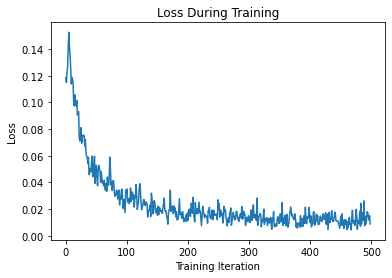

In [10]:
plt.plot(losses)
plt.ylabel("Loss")
plt.xlabel("Training Iteration")
plt.title("Loss During Training")

### Test on 10000 trials to examine performance

In [11]:
trials = 10000
batches = int(np.ceil(trials / N_batch))

rnn_state = np.zeros((trials, task.N_steps, model.N_rec))
rnn_out = np.zeros((trials, task.N_steps, model.N_out))

coherence = np.zeros(trials)
green_side = np.zeros(trials)
target_onset = np.zeros(trials)
checker_onset = np.zeros(trials)

decision = np.zeros(trials)
rt = np.zeros(trials)

In [12]:
for b in tqdm(range(batches)):
    x, y, m, params = task.get_trial_batch()
    outputs, states, inputs = model.test(x)
    
    start_index = N_batch * b
    end_index = N_batch * (b + 1)
    rnn_state[start_index:end_index] = states
    rnn_out[start_index:end_index] = outputs
    
    thr = np.where(outputs > 0.7)
    
    for i in range(N_batch):
        index = start_index + i
        
        coherence[index] = params[i]["coherence"]
        green_side[index] = params[i]["side"]
        target_onset[index] = params[i]["target_onset"]
        checker_onset[index] = params[i]["checker_onset"]
        
        thr_time = thr[1][thr[0]==i][0] if sum(thr[0]==i) > 0 else outputs.shape[1]
        thr_unit = thr[2][thr[0]==i][0] if sum(thr[0]==i) > 0 else np.argmax(outputs[i, -1])
        decision[index] = thr_unit
        rt[index] = thr_time*task.dt - target_onset[index] - checker_onset[index]       

100%|██████████| 200/200 [01:20<00:00,  2.48it/s]


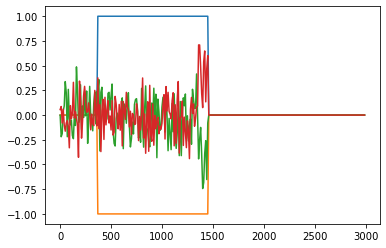

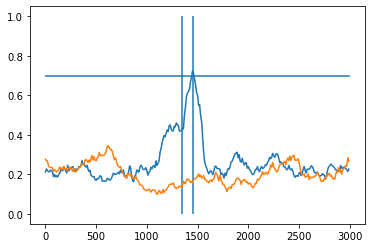

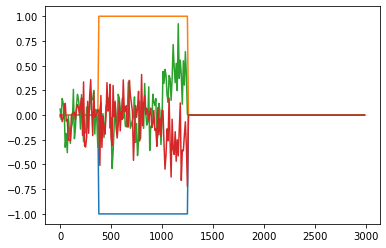

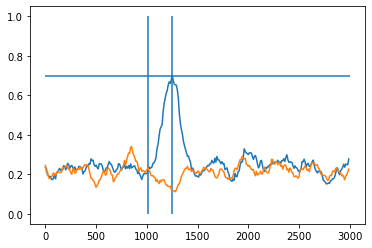

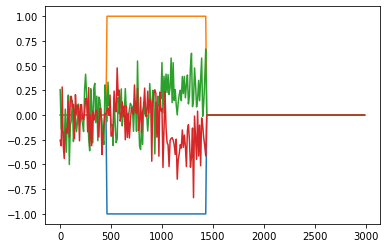

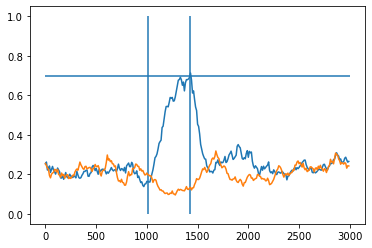

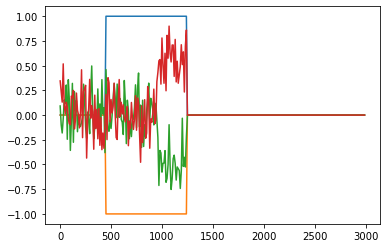

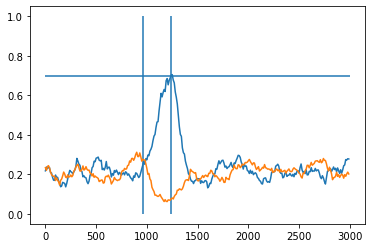

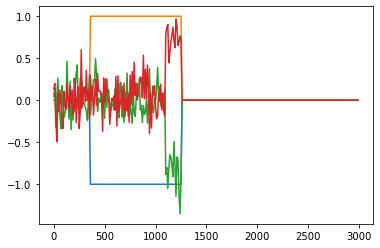

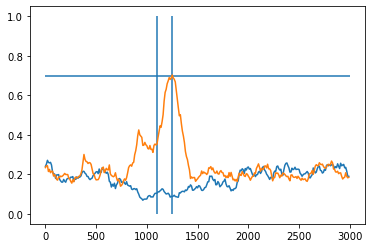

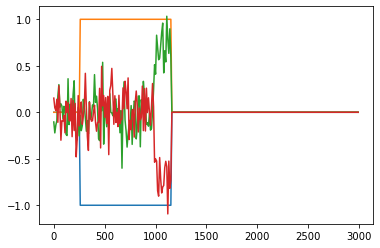

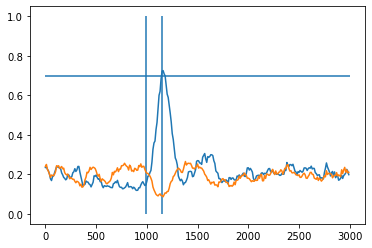

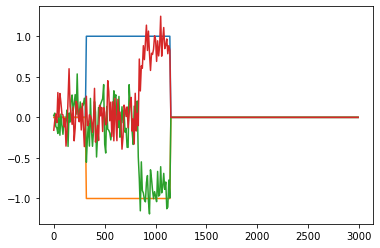

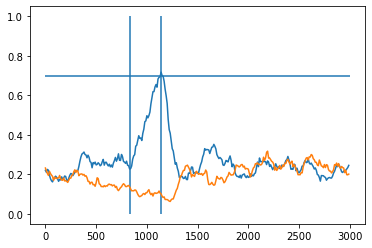

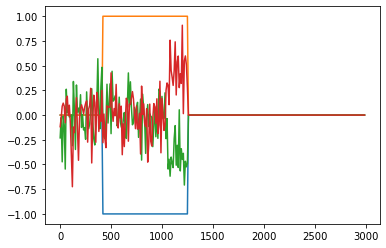

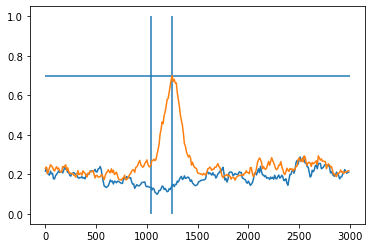

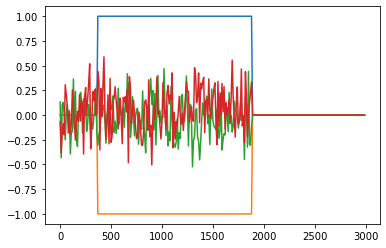

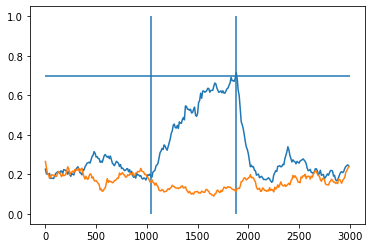

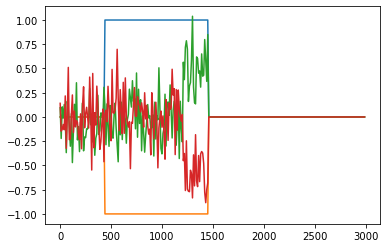

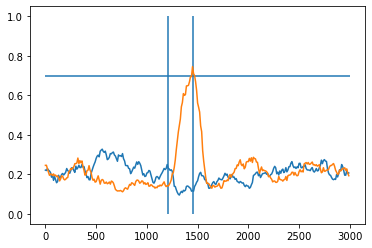

In [13]:
#onsets = [p["onset_time"] for p in params]
onsets = target_onset[-N_batch:] + checker_onset[-N_batch:]
rts = rt[-N_batch:]
for i in range(10):
    plt.figure()
    plt.plot(np.arange(0, 3000, 10), inputs[i, :, 0])
    plt.plot(np.arange(0, 3000, 10), inputs[i, :, 1])
    plt.plot(np.arange(0, 3000, 10), inputs[i, :, 2])
    plt.plot(np.arange(0, 3000, 10), inputs[i, :, 3])

    plt.figure()
    plt.plot(np.arange(0, 3000, 10), outputs[i, :, 0])
    plt.plot(np.arange(0, 3000, 10), outputs[i, :, 1])
    
    plt.vlines(onsets[i], 0, 1)
    plt.vlines(onsets[i] + rts[i], 0, 1)
    plt.hlines(0.7, 0, 3000)

In [15]:
correct_side = np.array([gs if coh > 0 else abs(gs-1) for coh, gs in zip(coherence, green_side)])
green_decision = np.array([int(dec == gs) for dec, gs in zip(decision, green_side)])
checker_df = pd.DataFrame({'trial' : np.arange(trials),
                           'coherence' : coherence,
                           'coherence_bin' : np.round(coherence, 1),
                           'green_side' : green_side,
                           'correct_side' : correct_side,
                           'target_onset' : target_onset,
                           'checker_onset' : checker_onset,
                           'decision' : decision,
                           'green_decision' : green_decision,
                           'decision_time' : rt,
                           'correct_decision' : (decision == correct_side).astype(int)})
checker_mean = checker_df.groupby('coherence_bin').mean().reset_index()


In [16]:
checker_mean

,coherence_bin,trial,coherence,green_side,correct_side,target_onset,checker_onset,decision,green_decision,decision_time,correct_decision
0,-0.9,4785.520295,-0.873683,0.498155,0.501845,371.339483,747.963100,0.501845,0.000000,153.612546,1.000000
1,-0.8,5046.182444,-0.800980,0.490534,0.509466,371.958692,749.524957,0.509466,0.000000,159.841652,1.000000
2,-0.7,4839.984183,-0.700794,0.488576,0.511424,371.158172,748.237258,0.511424,0.000000,175.947276,1.000000
3,-0.6,5119.364151,-0.598575,0.454717,0.545283,375.194340,753.986792,0.545283,0.000000,190.950943,1.000000
4,-0.5,4926.397436,-0.501327,0.483516,0.516484,375.010989,752.857143,0.516484,0.000000,219.000000,1.000000
5,-0.4,5152.200000,-0.402029,0.510909,0.489091,375.583636,754.905455,0.489091,0.000000,252.838182,1.000000
6,-0.3,5045.488117,-0.298844,0.515539,0.484461,379.906764,734.530165,0.484461,0.000000,305.581353,1.000000
7,-0.2,5103.351351,-0.200683,0.494932,0.505068,378.331081,758.327703,0.505068,0.000000,386.500000,1.000000
8,-0.1,4876.503546,-0.098578,0.503546,0.496454,371.824468,749.246454,0.494681,0.001773,888.290780,0.998227
9,-0.0,4786.699620,0.000335,0.475285,0.460076,375.467681,760.072243,0.359316,0.427757,1713.167300,0.819392


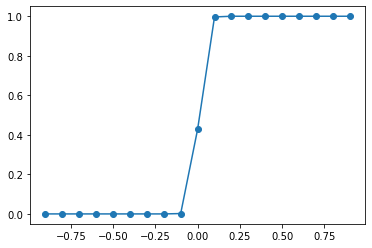

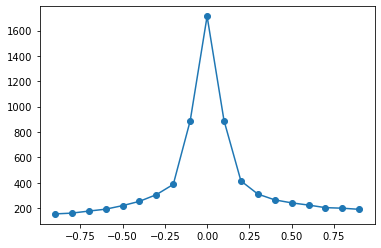

In [17]:
plt.figure()
plt.plot(checker_mean['coherence_bin'], checker_mean['green_decision'])
plt.scatter(checker_mean['coherence_bin'], checker_mean['green_decision'])

plt.figure()
plt.plot(checker_mean['coherence_bin'], checker_mean['decision_time'])
plt.scatter(checker_mean['coherence_bin'], checker_mean['decision_time'])